Original DataFrame:
   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  

Updated DataFrame:
   Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0              7               99                           1            9   

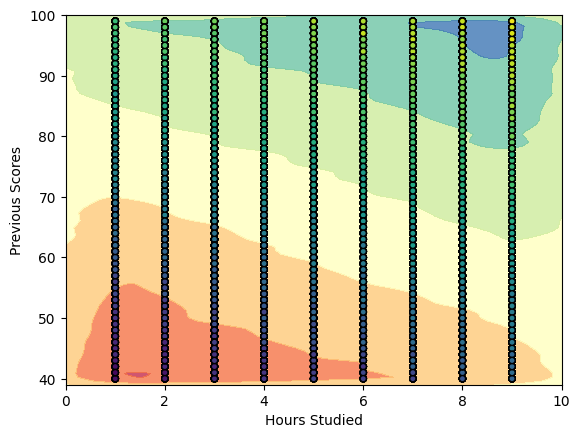

In [1]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import mean_squared_error, r2_score
import time

# Load the dataset
performance = pd.read_csv('/content/drive/MyDrive/Student_Performance.csv')

# Print the original DataFrame for reference
print("Original DataFrame:")
print(performance.head())

# Convert "Yes" and "No" to 1's and 0's in the relevant column (e.g., 'Extracurricular Activities')
performance['Extracurricular Activities'] = performance['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

# Print the updated DataFrame to verify the changes
print("\nUpdated DataFrame:")
print(performance.head())

# Prepare features (X) and target (y)
X = performance.drop(columns=['Performance Index'])  # Assuming 'Performance Index' is the target
y = performance['Performance Index']

# Check the first few rows of X and y
print("\nFeatures (X):")
print(X.head())
print("\nTarget (y):")
print(y.head())

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# Build the model
svm = SVR(kernel="rbf", gamma=0.5, C=1.0) # we can use linear, poly and sigmoid on kernal
print("\nModel:", svm)
print("Training Set: ", len(X_train))
print("Testing Set: ", len(X_test))

# Start time for training
start_time = time.time()

# Train the model
svm.fit(X_train, y_train)

# End time for training
end_time = time.time()
print("\nTraining Time:", end_time - start_time, "seconds")

# Predict the model
y_pred = svm.predict(X_test)

# Calculate and print performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nMean Squared Error:", mse)
print("R-squared:", r2)



# Plot Decision Boundary (for visualization purposes, use only the first two features)
X_plot = X.iloc[:, :2]  # Only take the first two features for plotting
svm_plot = SVR(kernel="rbf", gamma=0.5, C=1.0)
svm_plot.fit(X_plot, y)

DecisionBoundaryDisplay.from_estimator(
    svm_plot,
    X_plot,
    response_method="predict",
    cmap=plt.cm.Spectral,
    alpha=0.8,
    xlabel=X.columns[0],
    ylabel=X.columns[1],
)

# Scatter plot
plt.scatter(X_plot.iloc[:, 0], X_plot.iloc[:, 1], c=y, s=20, edgecolors="k")
plt.show()